# Bayes' Theorem

Bayes' Theorem gives us a way to *invert* conditional probabilities. The formula comes from the definition of conditional probability

$$P(A|B) = \dfrac{P(A \cap B)}{P(B)}$$

this implies the following

$$P(A \cap B) = P(A|B)P(B) = P(B|A)P(A)$$

Solving for $P(A|B)$ we get

$$P(A|B) = \dfrac{P(B|A)P(A)}{P(B)}$$

Though this is the final form, in practice you will need to compute $P(B)$ using the following

$$P(B) = P(B|A) + P(B|\overline{A})$$

which says the probability of $B$ is the sum of the probability of $B$ given $A$ and $B$ given not $A$. ($A$ is either true or false so these are the only two options)

## Exercise 1: Plot a Venn Diagram

Using matplotlib, draw a simple Venn diagram representing two sets $A$, $B$ with a non-null intersection.

## Code here. Add cells as needed

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib_venn import venn2

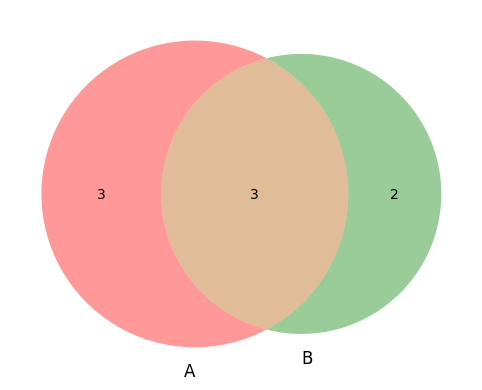

In [2]:
A = set([1, 2, 3, 4, 5, 6])
B = set([4, 5, 6, 7, 8])
venn2((A, B))
plt.show()

## Exercise 2: Compute Bayes' Probabilities

We want to replicate the computation carried out in class. If a doctor performs a test that has a given accuracy, for a disease with a given incidence rate, determine the probability that a randomly selected person with a positive test result has the disease. You are given *accuracy* and *incidence* as input, both in the range $(0,1]$

In [3]:
def get_bayes_probability(acc, inc):
    p_pos = acc * inc + (1 - acc) * (1 - inc)
    bayes = (acc * inc) / p_pos
    return bayes

Check some results below. The first one comes from class

In [4]:
get_bayes_probability(0.97,0.001)

0.031351001939237205

In [5]:
get_bayes_probability(0.97,0.01)

0.24619289340101508

In [6]:
get_bayes_probability(0.97,0.1)

0.7822580645161289

In [7]:
get_bayes_probability(0.99,0.001)

0.09016393442622944

In [8]:
get_bayes_probability(0.50,0.001)

0.001

In [9]:
get_bayes_probability(0.97, 0.9)

0.9965753424657534

## Exercise 3: Plot

You will create two plots in the section. For a fixed incidence rate, plot the bayes probability as the accuracy of the test ranges from 0 to 100%.

Then, for a fixed accuracy, plot the bayes probability as the incidence rate increases.

**Note**, to avoid 1/0 errors you'll probably want to *not* go all the way to 0 or 1.

State a conclusion about the results. What's the correlation? What do you observe? What do you think about accuracy measures for tests now?

Hint: create two arrays `X,Y` (python lists) of the same length containing the X values in one array and the Y values in another. List comprehensions are the best way to do this in python, though a for loop is fine too (append to an initially empty list)

then use `plt.plot(X,Y)`

In [10]:
from matplotlib import pyplot as plt

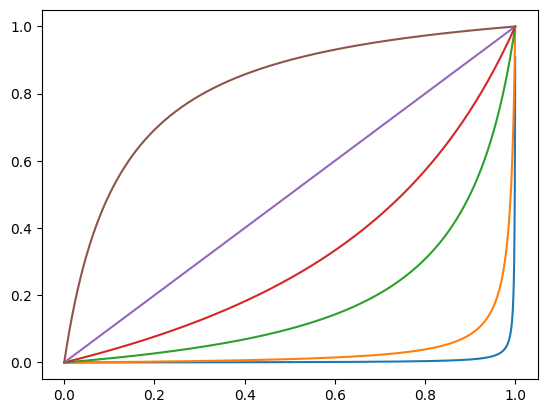

In [11]:
# code here. add as needed
#fixed incidence rate, variable probability
incs = [0.001, 0.01, 0.1, 0.25, 0.5, 0.9]
fig, ax = plt.subplots()
for fixed_inc in incs:
    x = np.linspace(0.0001, 1, 10000, endpoint=False)
    y = [get_bayes_probability(i, fixed_inc) for i in x]
    ax.plot(x, y)
plt.show()

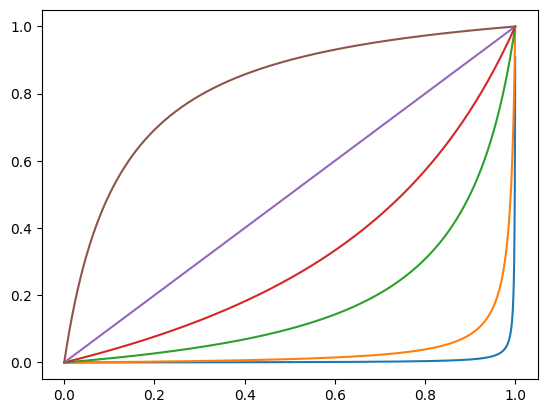

In [12]:
# code here. add as needed
#fixed incidence rate, variable probability
accs = [0.001, 0.01, 0.1, 0.25, 0.5, 0.9]
fig, ax = plt.subplots()
for fixed_acc in accs:
    x = np.linspace(0.0001, 1, 10000, endpoint=False)
    y = [get_bayes_probability(fixed_acc, i) for i in x]
    
    ax.plot(x, y)
plt.show()

## Exercise 4: Beautify plots

Now go back and beautify your plots. Add a title and a legend. Some axis labels. Maybe read about matplotlib styles and change up the colors. Try a different type of  plot. Just experiment some. Results below.

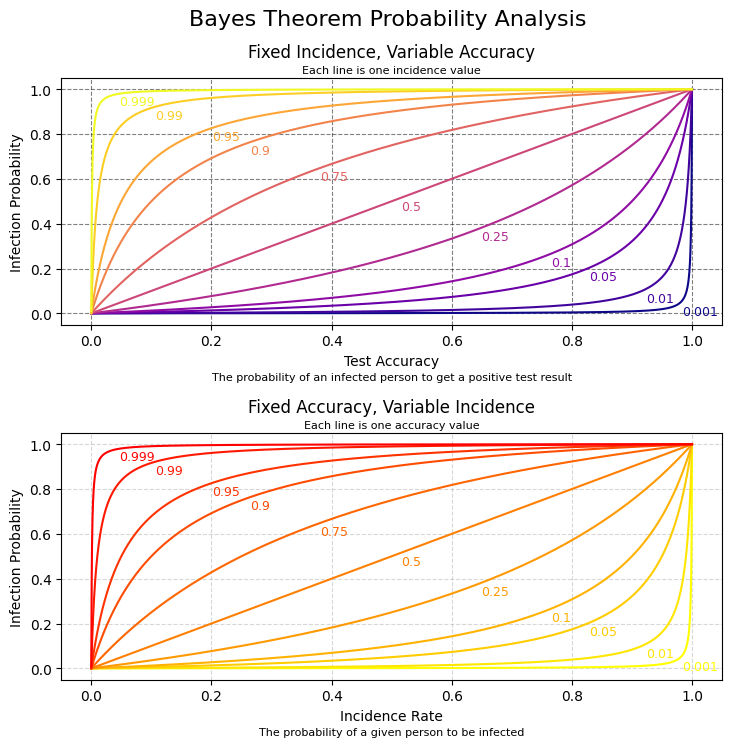

In [24]:
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

values = [0.001, 0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 0.999]

#TODO: add second plot into this, labels, research more
fig, (incplot, accplot) = plt.subplots(2, 1, figsize=(6, 8))
plt.subplots_adjust(hspace=0.45)
cmap = plt.get_cmap('plasma')
cmap2 = plt.get_cmap('autumn_r')
norm = Normalize(vmin = 0, vmax = len(values) - 1)


fig.suptitle("Bayes Theorem Probability Analysis", x=0.655, fontsize=16, ha='center', y=.93)
incplot.set_title("Fixed Incidence, Variable Accuracy", fontsize=12, y=1.05)
incplot.annotate('Each line is one incidence value', xy=(0.5, 1.02), xycoords='axes fraction', fontsize=8, ha='center')
accplot.set_title("Fixed Accuracy, Variable Incidence", fontsize=12, y=1.05)
accplot.annotate('Each line is one accuracy value', xy=(0.5, 1.02), xycoords='axes fraction', fontsize=8, ha='center')


incplot.set_xlabel("Test Accuracy", y=-0.15)
incplot.annotate('The probability of an infected person to get a positive test result', xy=(0.5, -0.225), xycoords='axes fraction', fontsize=8, ha='center')
incplot.set_ylabel("Infection Probability", x=-1.4)
#incplot.annotate('The probability of a person with a positive test result to be infected', xy=(-0.1, 0.5), xycoords='axes fraction', fontsize=8, ha='center', va='center', rotation='vertical')

accplot.set_xlabel("Incidence Rate", y=-0.15)
accplot.annotate('The probability of a given person to be infected', xy=(0.5, -0.225), xycoords='axes fraction', fontsize=8, ha='center')
accplot.set_ylabel("Infection Probability", x=-1.4)
#accplot.annotate('The probability of a person with a positive test result to be infected', xy=(-0.1, 0.5), xycoords='axes fraction', fontsize=8, ha='center', va='center', rotation='vertical')

incplot.grid(True, linestyle='--', alpha=0.5, color='k') 
accplot.grid(True, linestyle='--', alpha=0.5)



for i, inc in enumerate(values):
    x = np.linspace(0.00001, 1.0002, 5000, endpoint=False)
    y = [get_bayes_probability(j, inc) for j in x]
    color = cmap(norm(i))
    for j in range(len(x)):
        if abs(1 - x[j] - y[j]) < 1e-2:
            incplot.text(x[j] + 0.02, y[j] - 0.02, f'{inc}', color=color,fontsize=9, verticalalignment='center')
            break;
    incplot.plot(x,y, color=color, label=f'{inc}')

for i, acc in enumerate(values):
    x = np.linspace(0.00001, 1.0002, 5000, endpoint=False)
    y = [get_bayes_probability(acc, j) for j in x]
    color = cmap2(norm(i))
    for j in range(len(x)):
        if abs(1 - x[j] - y[j]) < 1e-2:
            accplot.text(x[j] + 0.02, y[j] - 0.02, f'{acc}', color=color,fontsize=9, verticalalignment='center')
            break;
    accplot.plot(x,y, color=color, label=f'{acc}')
    
plt.tight_layout(rect=[0, 0, 1.25, 0.95])
plt.show()

## Conclusion:

Both the accuracy and incidence plots look pretty much the same, implying that the probability of having the disease given a positive result depends on both factors evenly. The curves generated by the function appear similar to the curves generated by $y=\frac{1}{x}$. This makes sense since the bayes function is pretty much multiplying the two inputs together with extra steps. The concavity of the curve depends on the fixed value of accuracy, with lower values being more concave up. When the incidence rate is close to 1, all of the lines approach a 100% chance of infection (because if everyone is infected, then a given person has a 100% chance to be infected, regardless of test result). The reverse happens when the incidence rate is 0. The graphs are both symmetric, which further shows how which value is which doesn't matter that much (the incidence and accuracy values can be swapped for the same result, supporting Bayes' Theorem). The more accurate a test is, the quicker the infection probability shoots up, and this makes a drastic difference when the infection rate is low. However, once the incidence rate goes up, the more accurate tests quickly converge to 100% chance of being infected. Test accuracy is very important when there is a low incidence, but for higher incidence rates of the disease, its fine to buy a less accurate test.